In [169]:
import os
import pandas as pd
import geopandas as gpd
import shapely
import numpy as np

In [95]:
energy_2018 = pd.read_csv("raw_data/Local_Law_84_2019__Monthly_Data_for_Calendar_Year_2018_.csv", na_values='Not Available')
energy_2019 = pd.read_csv("raw_data/Local_Law_84_2020__Monthly_Data_for_Calendar_Year_2019_.csv", na_values='Not Available')
energy_2020 = pd.read_csv("raw_data/Local_Law_84_2021__Monthly_Data_for_Calendar_Year_2020_.csv", na_values='Not Available')

In [255]:
sorted(energy_2018.columns)

['Electricity Use  (kBtu)',
 'Month',
 'Natural Gas Use  (kBtu)',
 'Parent Property Id',
 'Parent Property Name',
 'Property Id',
 'Property Name']

In [97]:
sorted(energy_2019.columns)

['Electricity Use  (kBtu)',
 'Month',
 'Natural Gas Use  (kBtu)',
 'Parent Property Id',
 'Parent Property Name',
 'Property Id',
 'Property Name']

In [98]:
sorted(energy_2020.columns)

['Electricity Use  (kBtu)',
 'Month',
 'Natural Gas Use  (kBtu)',
 'Parent Property Id',
 'Parent Property Name',
 'Property Id',
 'Property Name']

In [99]:
# good to merge them all

In [100]:
monthly_energy = pd.concat([energy_2018, energy_2019, energy_2020], ignore_index=True)
monthly_energy.loc[:,"date"] = pd.to_datetime(monthly_energy.Month, format="%b-%y")

In [102]:
monthly_energy

,Property Id,Property Name,Parent Property Id,Parent Property Name,Month,Natural Gas Use (kBtu),Electricity Use (kBtu),date
0,7365,1155,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Jan-18,NaN,2191816.3,2018-01-01
1,7365,1155,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Feb-18,NaN,1881934.0,2018-02-01
2,7365,1155,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Mar-18,NaN,1960262.3,2018-03-01
3,7365,1155,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Apr-18,NaN,1842159.3,2018-04-01
4,7365,1155,Not Applicable: Standalone Property,Not Applicable: Standalone Property,May-18,NaN,1893434.5,2018-05-01
...,...,...,...,...,...,...,...,...
979183,17333571,110-31B Merrick Blvd,16804566,110-31 Merrick Boulevard,Aug-20,NaN,NaN,2020-08-01
979184,17333571,110-31B Merrick Blvd,16804566,110-31 Merrick Boulevard,Sep-20,NaN,NaN,2020-09-01
979185,17333571,110-31B Merrick Blvd,16804566,110-31 Merrick Boulevard,Oct-20,NaN,NaN,2020-10-01
979186,17333571,110-31B Merrick Blvd,16804566,110-31 Merrick Boulevard,Nov-20,NaN,NaN,2020-11-01


In [148]:
pluto = pd.read_csv("raw_data/pluto_21v4.csv")

/var/folders/71/tmg5fcfj21q43z9hgg0t0yr00000gn/T/ipykernel_36481/348011207.py:1: DtypeWarning: Columns (21,22,24,26,28,66) have mixed types. Specify dtype option on import or set low_memory=False.
  pluto = pd.read_csv("data/raw_data/pluto_21v4.csv")


In [156]:
print(pluto.iloc[0].to_string())

borough                                MN
block                                 563
lot                                  7502
cd                                  102.0
bct2020                         1006100.0
bctcb2020                   10061002000.0
ct2010                               61.0
cb2010                             2000.0
schooldist                            2.0
council                               2.0
zipcode                           10003.0
firecomp                             L003
policeprct                            6.0
healthcenterdistrict                 15.0
healtharea                         5700.0
sanitboro                             1.0
sanitdistrict                         2.0
sanitsub                               3A
address                 42 EAST 12 STREET
zonedist1                            C6-1
zonedist2                             NaN
zonedist3                             NaN
zonedist4                             NaN
overlay1                          

In [103]:
footprints = gpd.read_file("raw_data/Building Footprints.geojson")
footprints = footprints[footprints['base_bbl'].notna()]
footprints = footprints.rename(columns={"base_bbl":"bbl"})
footprints

,name,bbl,shape_area,heightroof,mpluto_bbl,cnstrct_yr,lststatype,feat_code,groundelev,geomsource,bin,lstmoddate,doitt_id,shape_len,geometry
0,None,3065220021,None,29.74985318,3065220021,1925,Constructed,2100,40,Photogramm,3170958,2017-08-22T00:00:00,96807,None,POINT (-73.96673 40.62602)
1,None,5012640036,None,22.63,5012640036,1965,Constructed,2100,39,Photogramm,5028452,2017-08-22T00:00:00,326368,None,POINT (-74.16795 40.63932)
2,None,5060190091,None,35.76,5060190091,1970,Constructed,2100,51,Photogramm,5078368,2017-08-22T00:00:00,746627,None,POINT (-74.19518 40.55610)
3,None,3086910048,None,37.5,3086910048,1928,Constructed,2100,6,Photogramm,3245111,2017-08-22T00:00:00,786626,None,POINT (-73.96116 40.57742)
4,None,4075020005,None,18.01511294,4075020005,1950,Constructed,2100,93,Photogramm,4161096,2017-08-22T00:00:00,746409,None,POINT (-73.75429 40.75584)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111414,None,5028360024,0.0,13.24887876,5028360024,1931,Constructed,2100,11,Photogramm,5042341,2017-08-22T00:00:00,268013,0.0,"MULTIPOLYGON (((-74.07239 40.62178, -74.07242 ..."
1111415,None,5026250083,0.0,33.02,5026250083,1989,Constructed,2100,29,Photogramm,5101842,2017-08-22T00:00:00,104264,0.0,"MULTIPOLYGON (((-74.18514 40.59287, -74.18513 ..."
1111416,None,4051180019,0.0,28.92,4051180019,1940,Constructed,2100,43,Photogramm,4115268,2017-08-22T00:00:00,494429,0.0,"MULTIPOLYGON (((-73.83037 40.74890, -73.83037 ..."
1111417,None,3040320118,0.0,26.21,3040320118,1991,Constructed,2100,30,Photogramm,3331073,2017-08-22T00:00:00,796623,0.0,"MULTIPOLYGON (((-73.88431 40.67205, -73.88435 ..."


In [201]:
footprints = gpd.read_file("raw_data/building.geojson")

In [208]:
footprints_clean = footprints.rename(columns={"base_bbl":"bbl"})
footprints_clean = footprints_clean.drop(columns=["shape_area","mpluto_bbl","lststatype","feat_code","geomsource","lstmoddate","doitt_id","shape_len", "name"])
footprints_clean = footprints_clean.drop_duplicates(["bbl","bin"])
footprints_clean

,bbl,heightroof,cnstrct_yr,groundelev,bin,geometry
0,3065220021,29.74985318,1925,40,3170958,"MULTIPOLYGON (((-73.96665 40.62600, -73.96685 ..."
1,5012640036,22.63,1965,39,5028452,"MULTIPOLYGON (((-74.16790 40.63936, -74.16790 ..."
2,5060190091,35.76,1970,51,5078368,"MULTIPOLYGON (((-74.19511 40.55611, -74.19520 ..."
3,3086910048,37.5,1928,6,3245111,"MULTIPOLYGON (((-73.96113 40.57744, -73.96115 ..."
4,4075020005,18.01511294,1950,93,4161096,"MULTIPOLYGON (((-73.75422 40.75591, -73.75417 ..."
...,...,...,...,...,...,...
1084484,5014950999,25.0,1986,35,5170853,"MULTIPOLYGON (((-74.15408 40.61844, -74.15393 ..."
1084485,5014950999,26.0,1986,37,5110805,"MULTIPOLYGON (((-74.15413 40.61907, -74.15429 ..."
1084486,5014950999,24.0,1986,36,5170867,"MULTIPOLYGON (((-74.15319 40.61894, -74.15334 ..."
1084487,5014950999,25.0,1986,36,5170871,"MULTIPOLYGON (((-74.15322 40.61932, -74.15339 ..."


In [209]:
# footprints_final = footprints_clean[polygons_idx].to_crs(32618)
footprints_final = footprints_clean.to_crs(32618)
footprints_final.loc[:,"area"] = footprints_final.geometry.area
footprints_final = footprints_final.to_crs(4326)

In [210]:
footprints_final

,bbl,heightroof,cnstrct_yr,groundelev,bin,geometry,area
0,3065220021,29.74985318,1925,40,3170958,"MULTIPOLYGON (((-73.96665 40.62600, -73.96685 ...",152.094834
1,5012640036,22.63,1965,39,5028452,"MULTIPOLYGON (((-74.16790 40.63936, -74.16790 ...",69.964695
2,5060190091,35.76,1970,51,5078368,"MULTIPOLYGON (((-74.19511 40.55611, -74.19520 ...",66.746009
3,3086910048,37.5,1928,6,3245111,"MULTIPOLYGON (((-73.96113 40.57744, -73.96115 ...",108.412516
4,4075020005,18.01511294,1950,93,4161096,"MULTIPOLYGON (((-73.75422 40.75591, -73.75417 ...",162.933664
...,...,...,...,...,...,...,...
1084484,5014950999,25.0,1986,35,5170853,"MULTIPOLYGON (((-74.15408 40.61844, -74.15393 ...",135.756934
1084485,5014950999,26.0,1986,37,5110805,"MULTIPOLYGON (((-74.15413 40.61907, -74.15429 ...",135.046050
1084486,5014950999,24.0,1986,36,5170867,"MULTIPOLYGON (((-74.15319 40.61894, -74.15334 ...",155.913189
1084487,5014950999,25.0,1986,36,5170871,"MULTIPOLYGON (((-74.15322 40.61932, -74.15339 ...",155.920793


In [212]:
# Amazing! We have footprints for every building
sum(footprints_final.area != 0)

/var/folders/71/tmg5fcfj21q43z9hgg0t0yr00000gn/T/ipykernel_36481/2205013049.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sum(footprints_final.area != 0)


1084487

In [213]:
annual_energy = pd.read_csv("raw_data/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2021__Data_for_Calendar_Year_2020_.csv")
annual_energy = annual_energy.rename(columns={
    "NYC Borough, Block and Lot (BBL)":"bbl",
    "NYC Building Identification Number (BIN)":"bin"
})

/var/folders/71/tmg5fcfj21q43z9hgg0t0yr00000gn/T/ipykernel_36481/4251100590.py:1: DtypeWarning: Columns (9,15,218,219) have mixed types. Specify dtype option on import or set low_memory=False.
  annual_energy = pd.read_csv("data/raw_data/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2021__Data_for_Calendar_Year_2020_.csv")


In [214]:
linking_keys = annual_energy[["Property Id","bbl","bin"]]

In [216]:
footprints_linked = pd.merge(footprints_final, linking_keys, left_on=["bbl","bin"], right_on=["bbl","bin"])

In [218]:
footprints_linked

,bbl,heightroof,cnstrct_yr,groundelev,bin,geometry,area,Property Id
0,1007640007,73.1511627,1930,22,1013712,"MULTIPOLYGON (((-74.00163 40.73976, -74.00168 ...",679.313491,6894297
1,3050830044,69.06206237,1937,54,3116615,"MULTIPOLYGON (((-73.95661 40.65354, -73.95660 ...",800.118427,3072462
2,2033180015,66.74,1938,150,2017499,"MULTIPOLYGON (((-73.89505 40.86992, -73.89504 ...",965.737397,6618635
3,3074040001,62.76,1940,13,3202112,"MULTIPOLYGON (((-73.95111 40.59469, -73.95109 ...",954.349144,3520553
4,3050580057,63.83,1938,57,3116089,"MULTIPOLYGON (((-73.96460 40.65233, -73.96459 ...",788.881078,5831878
...,...,...,...,...,...,...,...,...
9727,3017130007,104.0,2019,70,3421590,"MULTIPOLYGON (((-73.92312 40.67732, -73.92312 ...",748.020146,6311050
9728,1008280059,153.0,1908,42,1015659,"MULTIPOLYGON (((-73.98936 40.74465, -73.98952 ...",229.847566,6297705
9729,2029410001,23.0,1936,82,2114529,"MULTIPOLYGON (((-73.89799 40.84074, -73.89794 ...",2041.890424,6294477
9730,4098750001,58.81,1931,128,4211112,"MULTIPOLYGON (((-73.79367 40.71751, -73.79364 ...",3913.662278,1634759


In [219]:
monthly_subset = monthly_energy.drop_duplicates(subset=["Property Id"])

In [226]:
energy_footprints = pd.merge(footprints_linked, monthly_subset, left_on=["Property Id"], right_on=["Property Id"])
energy_footprints

,bbl,heightroof,cnstrct_yr,groundelev,bin,geometry,area,Property Id,Property Name,Parent Property Id,Parent Property Name,Month,Natural Gas Use (kBtu),Electricity Use (kBtu),date
0,1007640007,73.1511627,1930,22,1013712,"MULTIPOLYGON (((-74.00163 40.73976, -74.00168 ...",679.313491,6894297,255 WEST 14TH STREET,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Jan-19,432243.3,66054.2,2019-01-01
1,3050830044,69.06206237,1937,54,3116615,"MULTIPOLYGON (((-73.95661 40.65354, -73.95660 ...",800.118427,3072462,80 LENOX ROAD,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Jan-18,737600.0,75646.5,2018-01-01
2,2033180015,66.74,1938,150,2017499,"MULTIPOLYGON (((-73.89505 40.86992, -73.89504 ...",965.737397,6618635,CostaRealty LLC - 2776 Jerome ave,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Jan-18,23052.7,78403.6,2018-01-01
3,3074040001,62.76,1940,13,3202112,"MULTIPOLYGON (((-73.95111 40.59469, -73.95109 ...",954.349144,3520553,Eckstein: 1900 Ave W,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Jan-18,NaN,56850.0,2018-01-01
4,3050580057,63.83,1938,57,3116089,"MULTIPOLYGON (((-73.96460 40.65233, -73.96459 ...",788.881078,5831878,15 Crooke Avenue,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Jan-18,530699.8,59614.2,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9727,3017130007,104.0,2019,70,3421590,"MULTIPOLYGON (((-73.92312 40.67732, -73.92312 ...",748.020146,6311050,1875 ATLANTIC AVE DEVELOPMENT LLC,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Jan-18,NaN,212887.4,2018-01-01
9728,1008280059,153.0,1908,42,1015659,"MULTIPOLYGON (((-73.98936 40.74465, -73.98952 ...",229.847566,6297705,18 West 27th Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Jan-18,NaN,47439.8,2018-01-01
9729,2029410001,23.0,1936,82,2114529,"MULTIPOLYGON (((-73.89799 40.84074, -73.89794 ...",2041.890424,6294477,DPR - 2114529 - Crotona Park Pool and Bathhous...,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Jan-18,489800.0,64647.6,2018-01-01
9730,4098750001,58.81,1931,128,4211112,"MULTIPOLYGON (((-73.79367 40.71751, -73.79364 ...",3913.662278,1634759,Q131-0401326,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Jan-18,124900.0,115462.1,2018-01-01


In [251]:
energy_full = pd.merge(footprints_linked, monthly_energy, left_on=["Property Id"], right_on=["Property Id"])
energy_full

energy_full.to_file("energy_data.geojson", driver="GeoJSON")

/Users/tomdougherty/opt/anaconda3/envs/landsat/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [261]:
energy_pd = pd.DataFrame(energy_full).drop(columns=["geometry","Parent Property Id","Parent Property Name","Property Id"])
energy_pd.to_csv("energy_data.csv")

In [227]:
collecting_buildings = energy_footprints.loc[:,["bbl","bin","geometry"]]
collecting_buildings

,bbl,bin,geometry
0,1007640007,1013712,"MULTIPOLYGON (((-74.00163 40.73976, -74.00168 ..."
1,3050830044,3116615,"MULTIPOLYGON (((-73.95661 40.65354, -73.95660 ..."
2,2033180015,2017499,"MULTIPOLYGON (((-73.89505 40.86992, -73.89504 ..."
3,3074040001,3202112,"MULTIPOLYGON (((-73.95111 40.59469, -73.95109 ..."
4,3050580057,3116089,"MULTIPOLYGON (((-73.96460 40.65233, -73.96459 ..."
...,...,...,...
9727,3017130007,3421590,"MULTIPOLYGON (((-73.92312 40.67732, -73.92312 ..."
9728,1008280059,1015659,"MULTIPOLYGON (((-73.98936 40.74465, -73.98952 ..."
9729,2029410001,2114529,"MULTIPOLYGON (((-73.89799 40.84074, -73.89794 ..."
9730,4098750001,4211112,"MULTIPOLYGON (((-73.79367 40.71751, -73.79364 ..."


In [242]:
hulled_buildings = collecting_buildings.geometry.convex_hull

In [246]:
energy_footprints.loc[:,"hulled"] = hulled_buildings

In [249]:
hulled_buildings_prep = energy_footprints.loc[:,["bbl","bin","hulled"]]
hulled_buildings_prep = hulled_buildings_prep.rename(columns={"hulled":"geometry"})
hulled_buildings_prep

,bbl,bin,geometry
0,1007640007,1013712,"POLYGON ((-74.00175 40.73959, -74.00198 40.739..."
1,3050830044,3116615,"POLYGON ((-73.95694 40.65323, -73.95697 40.653..."
2,2033180015,2017499,"POLYGON ((-73.89497 40.86948, -73.89522 40.869..."
3,3074040001,3202112,"POLYGON ((-73.95156 40.59440, -73.95161 40.594..."
4,3050580057,3116089,"POLYGON ((-73.96477 40.65203, -73.96484 40.652..."
...,...,...,...
9727,3017130007,3421590,"POLYGON ((-73.92297 40.67720, -73.92319 40.677..."
9728,1008280059,1015659,"POLYGON ((-73.98952 40.74443, -73.98960 40.744..."
9729,2029410001,2114529,"POLYGON ((-73.89748 40.84026, -73.89814 40.840..."
9730,4098750001,4211112,"POLYGON ((-73.79462 40.71675, -73.79472 40.716..."


In [250]:
hulled_buildings_prep.to_file("buildings_for_collection_hulled.geojson", driver="GeoJSON")

/Users/tomdougherty/opt/anaconda3/envs/landsat/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


<AxesSubplot:>

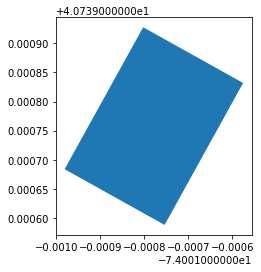

In [239]:
collecting_buildings[:1].plot()

In [228]:
collecting_buildings.to_file("buildings_for_collection.geojson", driver="GeoJSON")

/Users/tomdougherty/opt/anaconda3/envs/landsat/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [221]:
sum(energy_footprints.area == 0)

0

In [193]:
import fiona
fiona.listlayers('raw_data/NYC_DoITT_Planimetric_OpenData.gdb')

['PAVEMENT_EDGE',
 'HYDRO_STRUCTURE',
 'RETAININGWALL',
 'HYDROGRAPHY',
 'SIDEWALK',
 'PARK',
 'MEDIAN',
 'SWIMMING_POOL',
 'OPEN_SPACE_NO_PARK',
 'PARKING_LOT',
 'SHORELINE',
 'BOARDWALK',
 'RAILROAD',
 'TRANSPORT_STRUCTURE',
 'ELEVATION',
 'MISC_STRUCTURE_POLY',
 'CURB',
 'ROADBED',
 'PLAZA',
 'SIDEWALK_LINE',
 'RAILROAD_STRUCTURE']

In [199]:
gpd.read_file("data/raw_data/NYC_DoITT_Planimetric_OpenData.gdb", driver='FileGDB', layer='ELEVATION')

,ELEVATION,SOURCE_ID,FEATURE_CODE,SUB_FEATURE_CODE,STATUS,geometry
0,129.740000,2.130200e+10,3020,302000,Unchanged,POINT Z (989083.000 195003.260 129.740)
1,120.586263,2.130000e+10,3000,300020,Unchanged,POINT Z (987638.301 195007.228 120.586)
2,114.740000,2.130200e+10,3020,302000,Unchanged,POINT Z (988565.410 195011.600 114.740)
3,69.130000,2.130200e+10,3020,302000,Unchanged,POINT Z (989509.570 195013.270 69.130)
4,49.235397,2.130200e+10,3020,302000,Unchanged,POINT Z (987570.796 195019.969 49.235)
...,...,...,...,...,...,...
1473783,67.095098,2.030148e+10,3000,300000,Unchanged,POINT Z (1017400.404 189473.737 67.095)
1473784,46.077561,1.730148e+10,3000,300000,Unchanged,POINT Z (921759.459 129731.733 46.078)
1473785,4.010300,4.300002e+09,3000,300000,Unchanged,POINT Z (1030808.674 176721.414 4.010)
1473786,46.106200,9.300008e+09,3000,300000,Unchanged,POINT Z (1025474.001 199475.248 46.106)


In [ ]:
# this is kind of bad, we want to keep all of these buildings but almost none of them have good geometries

In [185]:
clean_energy_footprints = energy_footprints.dropna()
clean_energy_footprints = clean_energy_footprints.loc[clean_energy_footprints.area != 0, :]

/var/folders/71/tmg5fcfj21q43z9hgg0t0yr00000gn/T/ipykernel_36481/1065210015.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  clean_energy_footprints = clean_energy_footprints.loc[clean_energy_footprints.area != 0, :]


In [186]:
clean_energy_footprints

,bbl,heightroof,cnstrct_yr,groundelev,bin,geometry,area,Property Id,Property Name,Parent Property Id,Parent Property Name,Month,Natural Gas Use (kBtu),Electricity Use (kBtu),date
307932,1007640007,73.1511627,1930,22,1013712,"MULTIPOLYGON (((-74.00163 40.73976, -74.00168 ...",679.313491,6894297,255 WEST 14TH STREET,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Jan-19,432243.3,66054.2,2019-01-01
307933,1007640007,73.1511627,1930,22,1013712,"MULTIPOLYGON (((-74.00163 40.73976, -74.00168 ...",679.313491,6894297,255 WEST 14TH STREET,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Feb-19,350454.9,73451.5,2019-02-01
307934,1007640007,73.1511627,1930,22,1013712,"MULTIPOLYGON (((-74.00163 40.73976, -74.00168 ...",679.313491,6894297,255 WEST 14TH STREET,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Mar-19,299657.7,82145.2,2019-03-01
307935,1007640007,73.1511627,1930,22,1013712,"MULTIPOLYGON (((-74.00163 40.73976, -74.00168 ...",679.313491,6894297,255 WEST 14TH STREET,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Apr-19,159527.6,68193.6,2019-04-01
307936,1007640007,73.1511627,1930,22,1013712,"MULTIPOLYGON (((-74.00163 40.73976, -74.00168 ...",679.313491,6894297,255 WEST 14TH STREET,Not Applicable: Standalone Property,Not Applicable: Standalone Property,May-19,81627.2,66175.2,2019-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315367,2031670064,69.76,1922,123,2013823,"MULTIPOLYGON (((-73.89659 40.86383, -73.89657 ...",616.967568,6699408,2545 Grand Concourse,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Aug-20,14913.8,106397.4,2020-08-01
315368,2031670064,69.76,1922,123,2013823,"MULTIPOLYGON (((-73.89659 40.86383, -73.89657 ...",616.967568,6699408,2545 Grand Concourse,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Sep-20,14825.0,72280.9,2020-09-01
315369,2031670064,69.76,1922,123,2013823,"MULTIPOLYGON (((-73.89659 40.86383, -73.89657 ...",616.967568,6699408,2545 Grand Concourse,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Oct-20,15319.8,56273.7,2020-10-01
315370,2031670064,69.76,1922,123,2013823,"MULTIPOLYGON (((-73.89659 40.86383, -73.89657 ...",616.967568,6699408,2545 Grand Concourse,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Nov-20,15371.3,55778.9,2020-11-01


In [119]:
len(pd.unique(clean_energy_footprints["Property Id"]))

213

In [113]:
energy_footprints['Electricity Use  (kBtu)'].replace("Not Available"

SyntaxError: unexpected EOF while parsing (2426225995.py, line 1)

In [ ]:
energy_footprints.dropna(subset=['Natural Gas Use  (kBtu)','Electricity Use  (kBtu)'])

In [ ]:
pd.merge(monthly_energy, footprints, left_on="Property Id", right_on="base_bbl") 